# Flights Data Exploration
## by Aya Abulnasr



## Table of Contents
- [Introduction](#intro)
- [Data cleaning](#Data_cleaning)
- [Univariate Exploration](#Univariate)
- [Bivariate Exploration](#Bivariate)
- [Multivariate Exploration](#Multivariate)
- [Conclusion](#Conclusion)


<a id='intro'></a>
## Introduction

> This dataset reports flights in the United States, including
carriers, arrival and departure delays, and reasons for delays in 2008 through all year months. I will do some data exploration over our csv data file using some visualization and numbers. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('DelayedFlights.csv')
df.sample(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
255822,817256,2008,2,12,2,1411.0,1315,1713.0,1626,UA,...,3.0,17.0,0,N,0,0.0,14.0,0.0,0.0,33.0
283284,904579,2008,2,26,2,853.0,830,1116.0,1003,DL,...,9.0,46.0,0,N,0,0.0,23.0,50.0,0.0,0.0
536666,1682749,2008,3,8,6,955.0,925,1141.0,1110,AA,...,4.0,12.0,0,N,0,30.0,0.0,1.0,0.0,0.0
20811,64767,2008,1,23,3,751.0,715,1024.0,1000,WN,...,9.0,9.0,0,N,0,0.0,24.0,0.0,0.0,0.0
884436,3001915,2008,6,4,3,1650.0,1630,1827.0,1755,WN,...,7.0,15.0,0,N,0,0.0,0.0,12.0,0.0,20.0
368045,1154241,2008,2,1,5,1335.0,1325,1604.0,1608,CO,...,12.0,18.0,0,N,0,NaN,NaN,NaN,NaN,NaN
610614,1922551,2008,4,6,7,1903.0,1846,2137.0,2128,YV,...,7.0,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN
760421,2491604,2008,5,16,5,1954.0,1830,2129.0,2009,XE,...,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,80.0
456671,1425056,2008,3,27,4,1033.0,742,1755.0,1530,UA,...,7.0,14.0,0,N,0,145.0,0.0,0.0,0.0,0.0
421239,1298289,2008,3,3,1,2021.0,1855,2332.0,2218,XE,...,5.0,19.0,0,N,0,0.0,0.0,0.0,0.0,74.0


In [3]:
#df.Year.value_counts()
df.Month.value_counts()

12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: Month, dtype: int64

In [4]:
df = df.drop("Unnamed: 0",1)

In [5]:
df.shape

(1936758, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [7]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


<a id='Data_cleaning'></a>
# Data cleaning

In [8]:
# Drop some unneeded data columns
# I will remove the Year column since it's in 2008 only dataset. 
Deleted=['Year','ActualElapsedTime','CRSElapsedTime','FlightNum','TailNum','CRSArrTime']
df.drop(Deleted, axis=1, inplace=True)

In [9]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,WN,116.0,-14.0,8.0,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,WN,113.0,2.0,19.0,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,WN,76.0,14.0,8.0,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,WN,77.0,34.0,34.0,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,WN,87.0,11.0,25.0,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df.CancellationCode.value_counts())
print(df.Cancelled.value_counts())
print(df.Diverted.value_counts())

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64
0    1936125
1        633
Name: Cancelled, dtype: int64
0    1929004
1       7754
Name: Diverted, dtype: int64


In [11]:
# convert ArrDelay, cancelled, Diverted into ordered categorical types and add it in new "Status" coulmn.

for i in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0 #flight is on time
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1 #slightly delayed
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2 #severely delayed  
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4

In [12]:
df.Cancelled.value_counts()

0    1936125
1        633
Name: Cancelled, dtype: int64

In [13]:
#check the status new column, with cancelled trips
canceled = df[df.Cancelled== 1]
canceled.sample(10)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
1903247,12,26,5,854.0,805,NaN,AA,NaN,NaN,49.0,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,4.0
1871719,12,18,4,2026.0,2020,NaN,MQ,NaN,NaN,6.0,...,17.0,1,B,0,NaN,NaN,NaN,NaN,NaN,4.0
1815254,12,26,5,825.0,812,NaN,UA,NaN,NaN,13.0,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,4.0
1617708,10,25,6,2329.0,1800,NaN,B6,NaN,NaN,329.0,...,20.0,1,A,0,NaN,NaN,NaN,NaN,NaN,4.0
1609042,10,25,6,1408.0,1310,NaN,AA,NaN,NaN,58.0,...,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,4.0
1716059,11,13,4,1202.0,1100,NaN,AA,NaN,NaN,62.0,...,9.0,1,A,0,NaN,NaN,NaN,NaN,NaN,4.0
1930040,12,10,3,1913.0,1833,NaN,CO,NaN,NaN,40.0,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,4.0
1782994,12,10,3,1905.0,1625,NaN,YV,NaN,NaN,160.0,...,18.0,1,A,0,NaN,NaN,NaN,NaN,NaN,4.0
1649357,11,13,4,2223.0,2110,NaN,XE,NaN,NaN,73.0,...,68.0,1,B,0,NaN,NaN,NaN,NaN,NaN,4.0
1794562,12,26,5,1800.0,1705,NaN,OO,NaN,NaN,55.0,...,11.0,1,B,0,NaN,NaN,NaN,NaN,NaN,4.0


In [14]:
Deleted_2=['Diverted','Cancelled']
df.drop(Deleted_2, axis=1, inplace=True)

In [15]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,...,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
0,1,3,4,2003.0,1955,2211.0,WN,116.0,-14.0,8.0,...,810,4.0,8.0,N,NaN,NaN,NaN,NaN,NaN,0.0
1,1,3,4,754.0,735,1002.0,WN,113.0,2.0,19.0,...,810,5.0,10.0,N,NaN,NaN,NaN,NaN,NaN,0.0
2,1,3,4,628.0,620,804.0,WN,76.0,14.0,8.0,...,515,3.0,17.0,N,NaN,NaN,NaN,NaN,NaN,0.0
3,1,3,4,1829.0,1755,1959.0,WN,77.0,34.0,34.0,...,515,3.0,10.0,N,2.0,0.0,0.0,0.0,32.0,1.0
4,1,3,4,1940.0,1915,2121.0,WN,87.0,11.0,25.0,...,688,4.0,10.0,N,NaN,NaN,NaN,NaN,NaN,0.0


In [16]:
#Based of US week dating, first day of week is Monday
#Days_dict = {'1': 'Monday', '2': 'Tuesday','3': 'Wednesday','4': 'Thursday','5': 'Friday','6': 'Saturday','7': 'Sunday'}
#df=df.replace({"DayOfWeek": Days_dict})

### What is the structure of your dataset?

> We have 1936758 flight numbers "uncleaned yet" in 2008 over all year months in "Month, DayOfMonth, DayOfWeek" also some timing about arrivals, different reasons of flights delays. Cancelled flights and other info about trip origin and destination. 
CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

### What is/are the main feature(s) of interest in your dataset?

> Manily, for now I'm interested in timing and delays reason columns.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The reasons of delyed flights and time of year.

# Exploration
<a id='Univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables.

### Explore what is the most flight cancellation over year months and days of the week.
### Canceled Flights

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


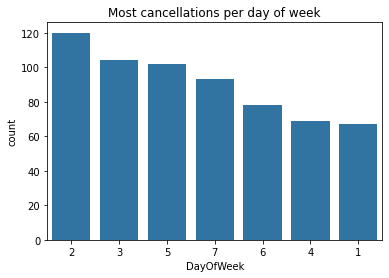

In [17]:
cancelled_1=df[df.Status == 4]

default_color = sb.color_palette()[0]
sb.countplot('DayOfWeek', order = cancelled_1['DayOfWeek'].value_counts().index, data=cancelled_1, color = default_color)
plt.title('Most cancellations per day of week');

It shows that second day of week "Tuesday" has the most cancellation flights, although Monday has the lowest cancellation over 2008

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


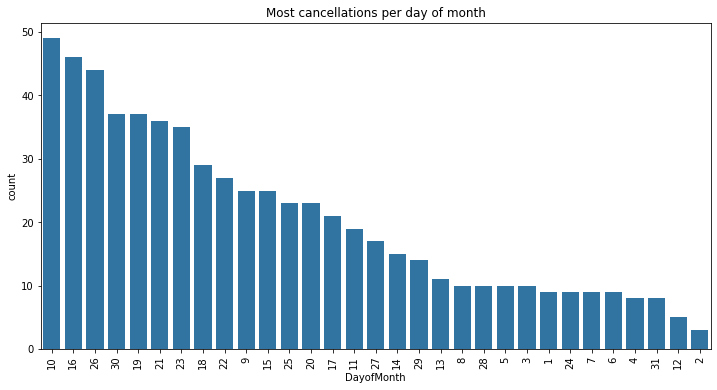

In [18]:
plt.figure(figsize=(12,6))
sb.countplot('DayofMonth', order = cancelled_1['DayofMonth'].value_counts().index, data=cancelled_1, color = default_color)
plt.xticks(rotation = 90)
plt.title('Most cancellations per day of month');

It shows that 10th day of Month had the most cancellation flights over 2008

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


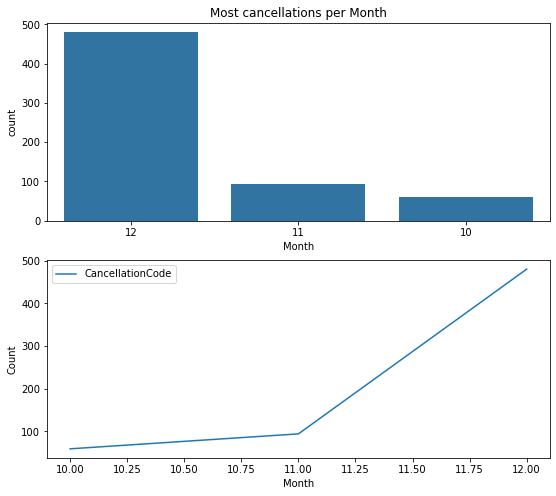

In [76]:
cancelled_1=df[df.Status == 4]

fig, ax = plt.subplots(nrows=2, figsize = [9,8])
plt.ylabel("Count")
ax[0].set_title('Most cancellations per Month')
sb.countplot('Month', order = cancelled_1['Month'].value_counts().index, data=cancelled_1, color = default_color, ax = ax[0])
cancelled_1[['Month','CancellationCode']].groupby(['Month']).count().plot(ax=ax[1]);

It shows that December had the most cancellation flights over 2008.

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


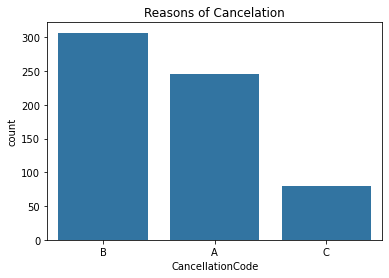

In [20]:
#Reason of Cancellation
cancelled_1=df[df.Status == 4]
sb.countplot('CancellationCode', order = cancelled_1['CancellationCode'].value_counts().index, data=cancelled_1, color = default_color)
plt.title('Reasons of Cancelation')
plt.show();

Cancellation reason was the most due to B = weather and the next reason is A = Carrier.

### Delayed Flights

In [21]:
Delayedflights = df[(df.Status >= 1) & (df.Status < 3)]
#sns.distplot(Delayedflights['ArrDelay'])
#plt.show()

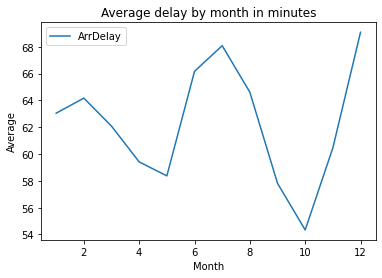

In [77]:
D = Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean().plot()
#plt.yticks(range(50,75))
#D.set_xlim(0,12)
#D.set_ylim(55,70)
plt.ylabel("Average")
D.set_title('Average delay by month in minutes');

In [23]:
#Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean()

Average delay is high mainly in Decemeber the most, then in July.

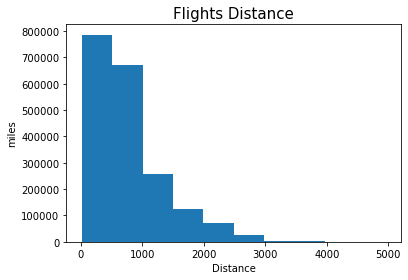

In [24]:
#plt.figure(figsize=(10,6))
plt.hist(df.Distance)
plt.xlabel("Distance", size=10)
plt.ylabel("miles")
plt.title("Flights Distance", size=15);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> so far, I don't see anything unusaul.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I see there's a lot of missing data but I prefer not messing around with them to get as much as accurate results. I get rid of some uneeded columns. But no need to adjust the form of data.

In [25]:
cancelled_2 = df[df['Status']== 4]
cancelled_2

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,...,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
1542406,10,27,1,1622.0,1420,NaN,WN,NaN,NaN,122.0,...,276,NaN,19.0,A,NaN,NaN,NaN,NaN,NaN,4.0
1546593,10,25,6,1323.0,1255,NaN,XE,NaN,NaN,28.0,...,529,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,4.0
1547161,10,22,3,1825.0,1815,NaN,XE,NaN,NaN,10.0,...,351,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,4.0
1547178,10,22,3,1733.0,1715,NaN,XE,NaN,NaN,18.0,...,253,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,4.0
1548271,10,15,3,1943.0,1745,NaN,XE,NaN,NaN,118.0,...,295,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934590,12,7,7,1526.0,1444,NaN,DL,NaN,NaN,42.0,...,712,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,4.0
1935491,12,10,3,1431.0,1422,NaN,DL,NaN,NaN,9.0,...,689,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,4.0
1935651,12,10,3,1459.0,1447,NaN,DL,NaN,NaN,12.0,...,712,NaN,37.0,A,NaN,NaN,NaN,NaN,NaN,4.0
1935876,12,11,4,1026.0,955,NaN,DL,NaN,NaN,31.0,...,760,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,4.0


<a id='Bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data.

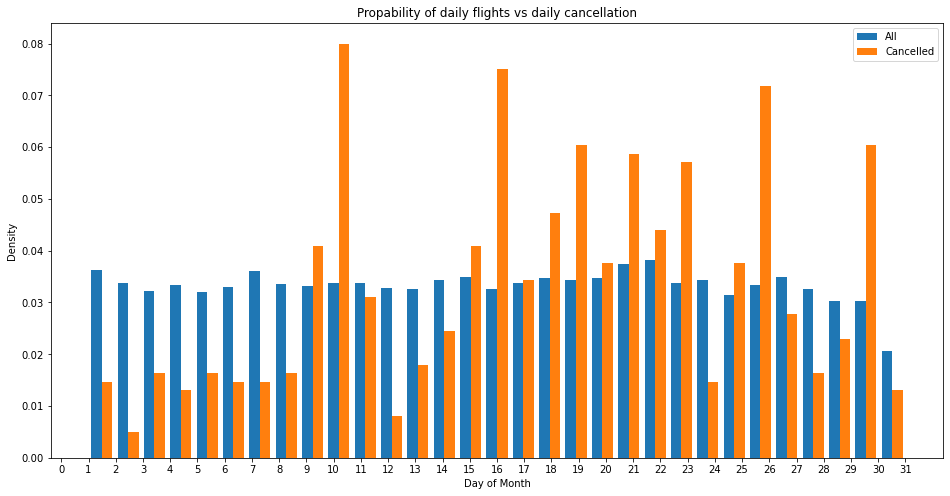

In [78]:
#Propability of daily cancellation
cancelled_2 = df[df['Status']== 4]

fig, ax = plt.subplots(figsize = (16,8))
ax.hist([df['DayofMonth'], cancelled_2['DayofMonth']], density=True ,bins=31, label=['All', 'Cancelled'])
ax.set_xlabel('Day of Month')
ax.set_ylabel('Density')
ax.set_title('Propability of daily flights vs daily cancellation')
plt.xticks(range(0,32))
plt.legend()
plt.show()

As we saw before, still 10th of the month had the heighest propapility of cancellation in 2008.

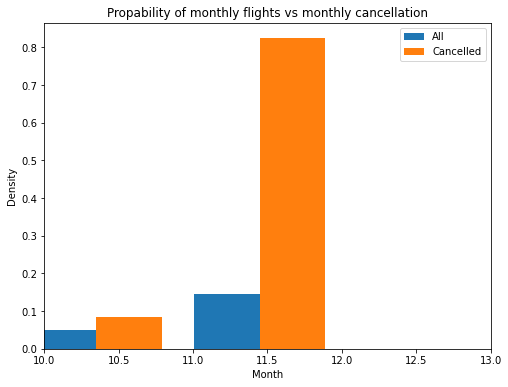

In [79]:
#Propability of daily cancellation
fig, ax = plt.subplots(figsize = (8,6))
ax.hist([df['Month'], cancelled_2['Month']], density=True, label=['All', 'Cancelled'])
ax.set_xlabel('Month')
ax.set_ylabel('Density')
ax.set_title('Propability of monthly flights vs monthly cancellation')
#plt.xticks(range(,13))
ax.set_xlim(10,13)
plt.legend()
plt.show()

Regarding the available data, December had the heighest propapility of cancellation in 2008.

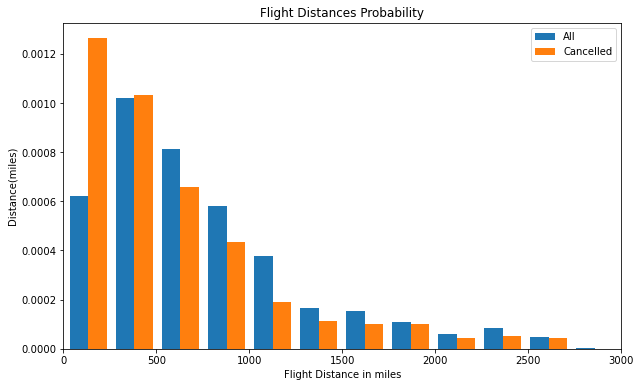

In [28]:
# Is distance affects the flight cancellation? 
fig, ax = plt.subplots(figsize = (10,6))

ax.hist([df['Distance'], cancelled_2['Distance']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Flight Distances Probability')
plt.ylabel('Distance(miles)')
plt.legend()
plt.show()

Here we can see the more the flight distance, the less is the flight cancellation.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Probability of cancellation on some days monthly. I would like to know the cancellation reason for this and if it's related to some carrier on that days.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> N/A


#### let's focus on carrier delays and it's reasons

In [30]:
print(df.UniqueCarrier.value_counts())

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64


<ipython-input-31-96c75b424326>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  D2 = df.groupby('UniqueCarrier')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum()


Text(0.5, 1.0, 'Delay Distribution by Carrier')

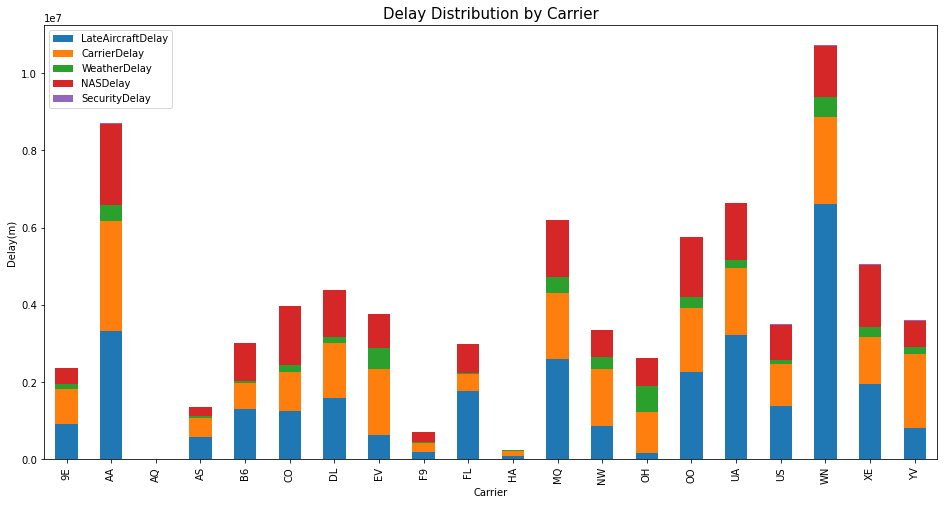

In [31]:
D2 = df.groupby('UniqueCarrier')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum()
D2.plot.bar(stacked=True ,figsize=(16, 8))
plt.xlabel("Carrier", size=10)
plt.ylabel("Delay(m)")
plt.title('Delay Distribution by Carrier', size=15)

In [32]:
D2

,LateAircraftDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay
UniqueCarrier,,,,,
9E,905944.0,908509.0,149270.0,391601.0,1553.0
AA,3334548.0,2821907.0,418677.0,2115126.0,6626.0
AQ,5350.0,8342.0,589.0,195.0,89.0
AS,591343.0,481815.0,47431.0,232822.0,7086.0
B6,1293092.0,676126.0,55219.0,978731.0,2093.0
CO,1254212.0,996161.0,200282.0,1515500.0,11392.0
DL,1600158.0,1411220.0,167124.0,1216198.0,1365.0
EV,640078.0,1686899.0,565167.0,879783.0,3519.0
F9,186316.0,248286.0,21017.0,265336.0,391.0


LateAircraftDelay seems to be the most effective variable on flights carrier delay especially on "WN" carrier but it could be due to "WN" high number of total flights.

PS: LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

#### Cancellation reasons regarding each carrier

In [33]:
cancelled_3 = cancelled_2

In [34]:
cancelled_3.UniqueCarrier.value_counts() #MQ has the most cancelled flights

MQ    104
OO     89
9E     58
YV     53
UA     47
AA     46
XE     46
CO     38
EV     29
US     26
DL     21
NW     16
WN     15
OH     12
AS     11
B6     10
FL      7
HA      3
F9      2
Name: UniqueCarrier, dtype: int64

In [35]:
cancelled_3[['Code_A','Code_B','Code_C']] = pd.get_dummies(cancelled_3.CancellationCode)

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<ipython-input-82-e3ba7605f6e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  D3 = cancelled_3.groupby('UniqueCarrier')['Code_A','Code_B','Code_C'].sum()


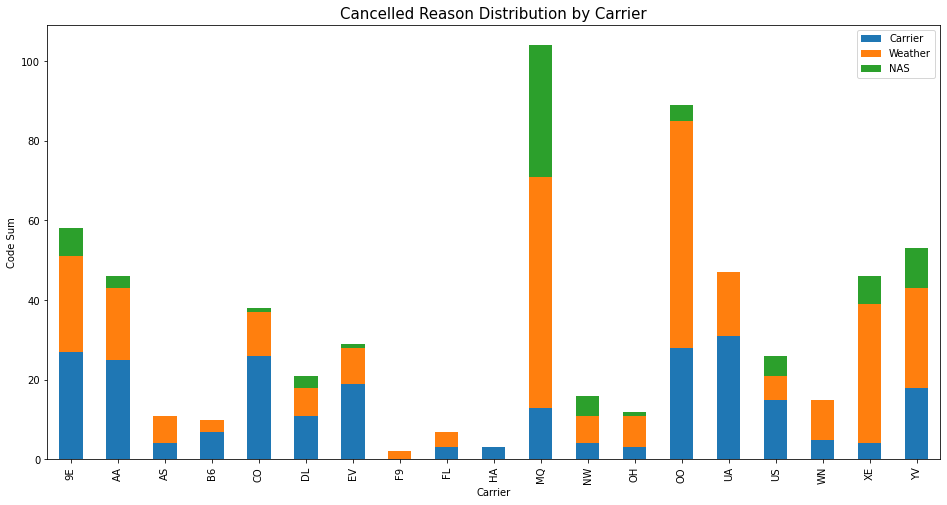

In [82]:
D3 = cancelled_3.groupby('UniqueCarrier')['Code_A','Code_B','Code_C'].sum()
D3.plot.bar(stacked=True ,figsize=(16, 8))
plt.xlabel("Carrier", size=10)
plt.ylabel("Code Sum", size=10)
plt.title('Cancelled Reason Distribution by Carrier', size=15)
plt.legend(['Carrier','Weather','NAS']);

As it seems Cancellation happens on most carriers due to weather factor as MQ "American Eagle Airlines" but something like HA "Hawaiian Airlines" has a few weather cancellation which make much sense. 

<a id='Multivariate'></a>
## Multivariate Exploration




### Delay reason along the year months.

<ipython-input-83-25705a746b7c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  D2 = D2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot(figsize=(10,8))


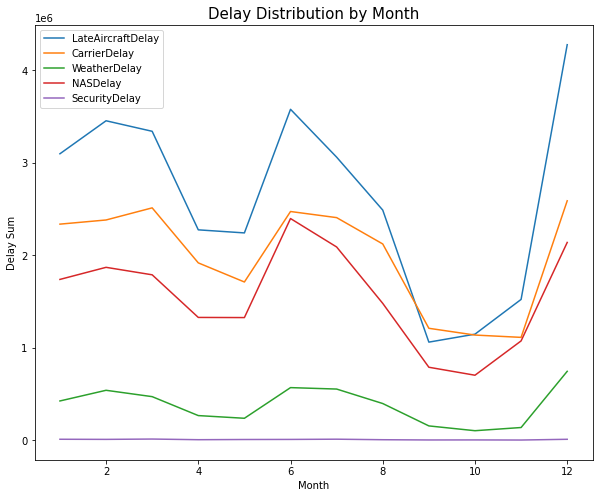

In [83]:
# Let's apply correlation matrix that shows the delay reasons along the months 
D2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
D2 = D2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot(figsize=(10,8))
D2.legend
plt.ylabel("Delay Sum", size=10)
plt.title('Delay Distribution by Month', size=15)
plt.show();

LateAircraftDelay is the main reason for delays in most of the months, next we got CarrierDelay and NASDelay "National Airspace System" as airport operations & heavy traffic volume.

### Carriers perfromance with time delay "LateAircraftDelay & CarrierDelay"

on Status we will show each carrier performance

0 : flight is on time
1 : slightly delayed
2 : severely delayed
3: Diverted
4: Cancelled

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


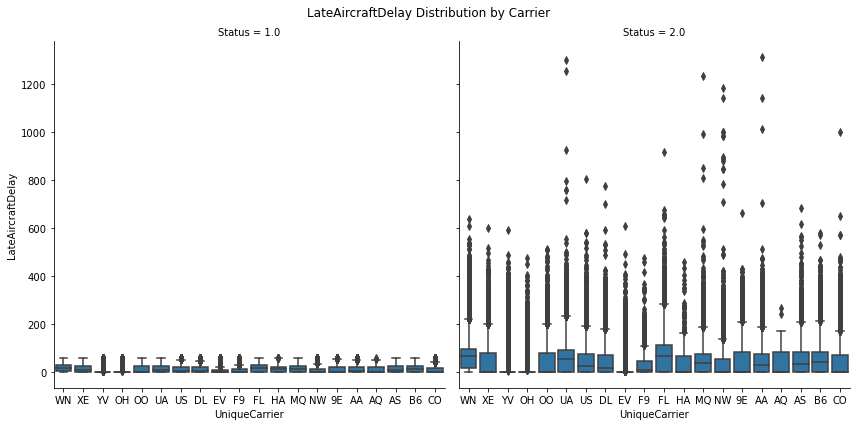

In [97]:
#LateAircraftDelay
g = sb.FacetGrid(data = Delayedflights, col = 'Status', col_wrap = 2, size = 6 )
g.map(sb.boxplot, 'UniqueCarrier', 'LateAircraftDelay')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('LateAircraftDelay Distribution by Carrier');

As we saw before Late Aircraft Delay is the most effective delay, here we see UA has the biggest delay period in severely delay status.

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


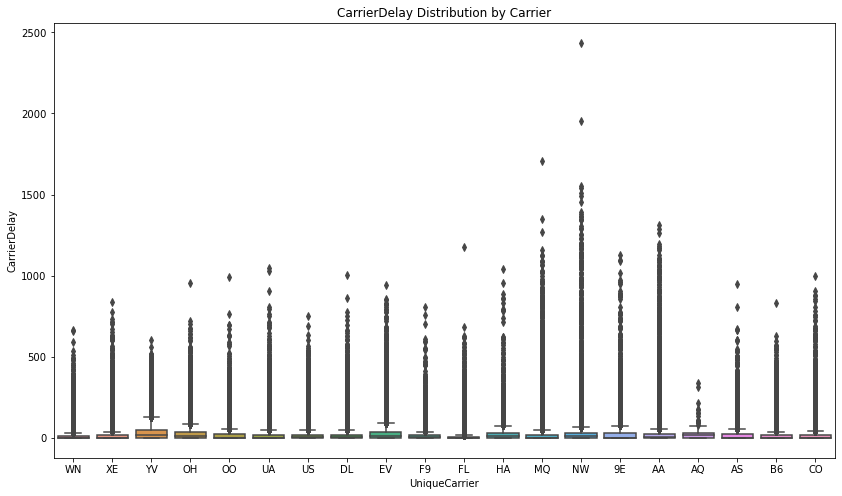

In [96]:
## Testing CarrierDelay, maybe it could relate in bivariate,
fig = plt.figure(figsize = [14,8])
D4 = sb.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights)
D4.set_title('CarrierDelay Distribution by Carrier')
plt.close(2)
plt.show()

C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\AbouElNasrA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


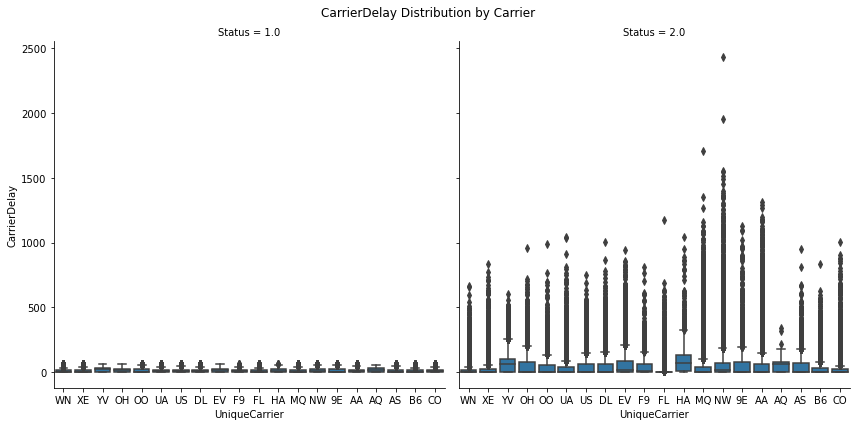

In [98]:
#CarrierDelay
g = sb.FacetGrid(data = Delayedflights, col = 'Status', col_wrap = 2, size = 6 )
g.map(sb.boxplot, 'UniqueCarrier', 'CarrierDelay')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('CarrierDelay Distribution by Carrier');

Carriers with higher average delay generation are Mesa Airlines (YV) & Hawaian Airlines (HA), it can be seen how airlines with lower volume of flights tend to have a higher Carrier Delay. So it seems like size matters. Also UA still has a high average carrier delay.

In [75]:
'''
fig = plt.figure(figsize = [14,10])
ax = sb.pointplot(data = df, x = 'UniqueCarrier', y = 'ArrDelay', hue = 'Status',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Carriers across arrival time delay and flight status')
plt.ylabel('Delay(m)')

plt.legend()
plt.show();
'''

"\nfig = plt.figure(figsize = [14,10])\nax = sb.pointplot(data = df, x = 'UniqueCarrier', y = 'ArrDelay', hue = 'Status',\n           palette = 'Blues', linestyles = '', dodge = 0.4)\nplt.title('Carriers across arrival time delay and flight status')\nplt.ylabel('Delay(m)')\n\nplt.legend()\nplt.show();\n"

<a id='conclusion'></a>
## Conclusion

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> On Genral, Flights delay has a strong relationship with aircraft arrival delay tothe airport also with carriers delay reasons such as aircraft cleaning, aircraft damage, crew, baggage, bird strike, fueling and so on. also the other delay reason could happens due to NASDelay "National Airspace System" as the airport operations & heavy traffic volume. 

> Late Aircraft Delay is the most effective delay, here we see UA has the highest delay period makes a severe delay. Carriers Delay also with higher average delay are Mesa Airlines (YV) & Hawaian Airlines (HA), it can be seen how airlines with lower volume of flights tend to have a higher Carrier Delay. So it seems like size matters. Also UA still has a high average carrier delay.

> Cancellatons happen mainly due to weather circumstances factor as it has the most effect on big carriers' flights such as MQ "American Eagle Airlines" also NAS has a big effect when the delay is more than 60 minutes! the flight got cancelled.

### Were there any interesting or surprising interactions between features?

> The more the flight distance, the less is the flight cancellation. Which could give a special treatment to the long distance flights to avoid any cancellations under any circumstances!

#### To conclude:
With evidence, delaying factors could be eliminated as much as possilble like what happens in long distance flights which will help a lot in decresing the cancellation accidents unless there's an emergency which safety is first. Also, airport readiness and size is such a great factor as we saw NAS delay has a big impact on the flights timing and carriers.
